<a href="https://colab.research.google.com/github/yeesem/Machine-Learning/blob/main/Tensorflow_Syntax_Basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yeesem/Machine-Learning-Datasets/main/Housing.csv')

In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


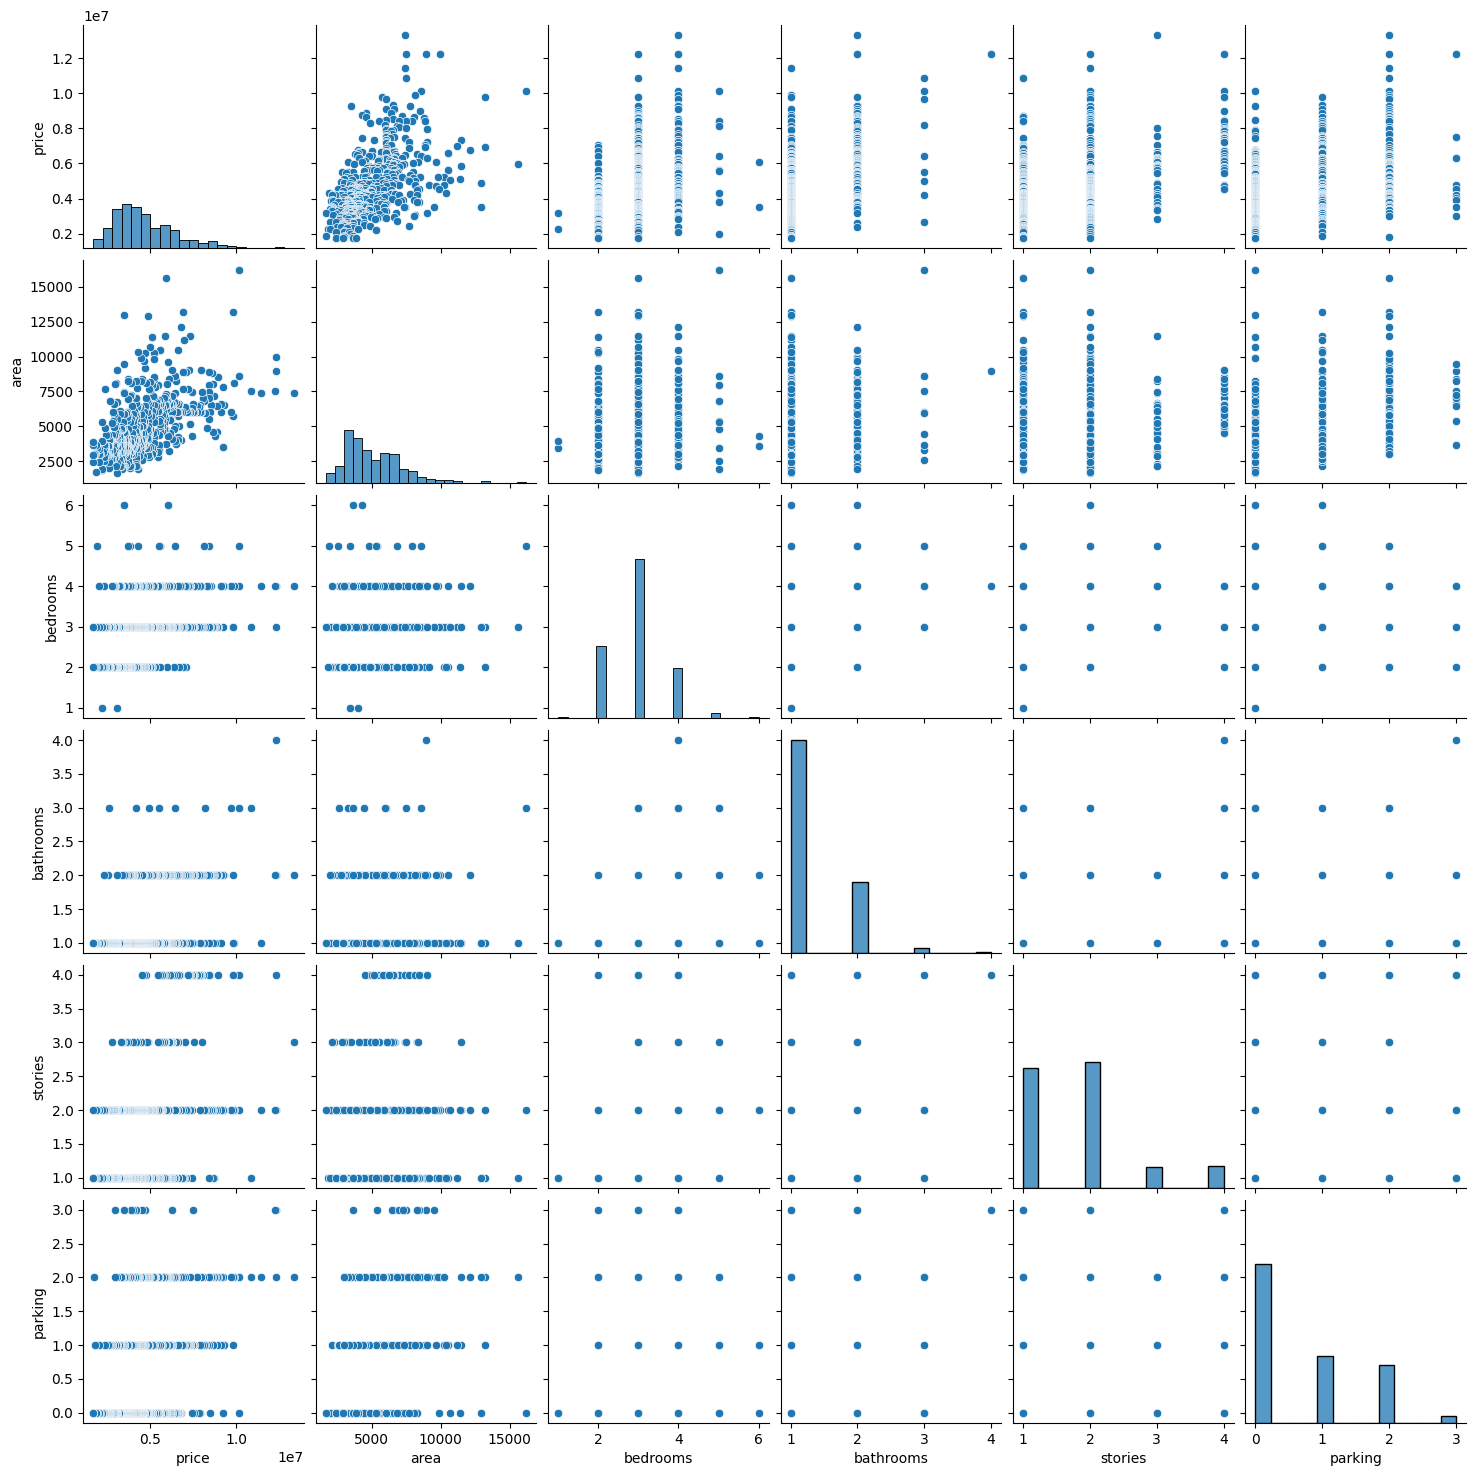

In [4]:
sns.pairplot(df)

In [5]:
df = pd.DataFrame(df[['price','bedrooms','bathrooms']])

In [6]:
df.head()

,price,bedrooms,bathrooms
0,13300000,4,2
1,12250000,4,4
2,12250000,3,2
3,12215000,4,2
4,11410000,4,1


In [7]:
X = df[['bathrooms','bedrooms']].values

In [8]:
X

array([[2, 4],
       [4, 4],
       [2, 3],
       ...,
       [1, 2],
       [1, 3],
       [1, 3]])

In [9]:
y = df['price'].values

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=101)

In [12]:
X_train.shape

(381, 2)

In [13]:
X_test.shape

(164, 2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
#Explanation of MinMaxScaler
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base.OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : bo

In [16]:
scaler = MinMaxScaler()

In [17]:
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train = scaler.transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
#Documentation of Sequential
help(Sequential)

Help on class Sequential in module keras.engine.sequential:

class Sequential(keras.engine.functional.Functional)
 |  Sequential(layers=None, name=None)
 |  
 |  `Sequential` groups a linear stack of layers into a `tf.keras.Model`.
 |  
 |  `Sequential` provides training and inference features on this model.
 |  
 |  Examples:
 |  
 |  ```python
 |  # Optionally, the first layer can receive an `input_shape` argument:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
 |  # Afterwards, we do automatic shape inference:
 |  model.add(tf.keras.layers.Dense(4))
 |  
 |  # This is identical to the following:
 |  model = tf.keras.Sequential()
 |  model.add(tf.keras.Input(shape=(16,)))
 |  model.add(tf.keras.layers.Dense(8))
 |  
 |  # Note that you can also omit the `input_shape` argument.
 |  # In that case the model doesn't have any weights until the first call
 |  # to a training/evaluation method (since it isn't yet built):
 |  model = tf.keras.Se

In [22]:
#2 Ways of creating Sequential Model
#Method 1
model = Sequential([Dense(4,activation = 'relu'),
                    Dense(2,activation = 'relu'),
                    Dense(1)])

In [23]:
#Method 2
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))

model.add(Dense(1))

In [24]:
model.compile(optimizer='rmsprop',loss='mse')

In [39]:
model.fit(x = X_train,y = y_train,epochs=2500)

Streaming output truncated to the last 5000 lines.
12/12 [==============================] - 0s 5ms/step - loss: 2472735145984.0000
Epoch 2/2500
12/12 [==============================] - 0s 4ms/step - loss: 2472894267392.0000
Epoch 3/2500
12/12 [==============================] - 0s 3ms/step - loss: 2472853372928.0000
Epoch 4/2500
12/12 [==============================] - 0s 5ms/step - loss: 2472597258240.0000
Epoch 5/2500
12/12 [==============================] - 0s 3ms/step - loss: 2472624259072.0000
Epoch 6/2500
12/12 [==============================] - 0s 3ms/step - loss: 2472734883840.0000
Epoch 7/2500
12/12 [==============================] - 0s 3ms/step - loss: 2472742223872.0000
Epoch 8/2500
12/12 [==============================] - 0s 9ms/step - loss: 2472543518720.0000
Epoch 9/2500
12/12 [==============================] - 0s 4ms/step - loss: 2472535654400.0000
Epoch 10/2500
12/12 [==============================] - 0s 9ms/step - loss: 2472503934976.0000
Epoch 11/2500
12/12 [==========

In [42]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

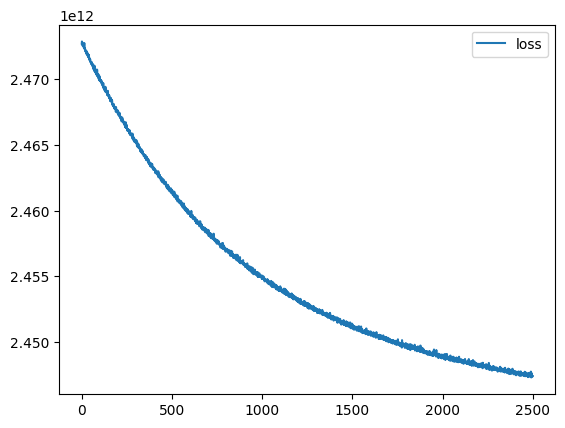

In [43]:
loss_df.plot()

In [44]:
model.evaluate(X_test,y_test,verbose=0)

2424014635008.0

In [45]:
model.evaluate(X_train,y_train,verbose=0)

2447142289408.0

In [46]:
test_prediction = model.predict(X_test)

6/6 [==============================] - 1s 2ms/step


In [50]:
test_predictions = pd.Series(test_prediction.reshape(164,))

In [51]:
test_predictions

0      3698244.25
1      5878722.00
2      5878722.00
3      4276865.50
4      3698244.25
          ...    
159    4276866.00
160    3698244.25
161    6457342.50
162    5878722.00
163    4276865.50
Length: 164, dtype: float32

In [52]:
pred_df = pd.DataFrame(y_test,columns=['Test True Y'])

In [54]:
pred_df.head()

,Test True Y
0,4753000
1,8890000
2,7455000
3,3773000
4,3780000


In [65]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [66]:
pred_df.head()

,Test True Y,0
0,4753000.0,3698244.25
1,8890000.0,5878722.00
2,7455000.0,5878722.00
3,3773000.0,4276865.50
4,3780000.0,3698244.25


In [67]:
pred_df.columns = ['Test True Y','Model Predictions']

In [68]:
pred_df.head(2)

,Test True Y,Model Predictions
0,4753000.0,3698244.25
1,8890000.0,5878722.00


<Axes: xlabel='Test True Y', ylabel='Model Predictions'>

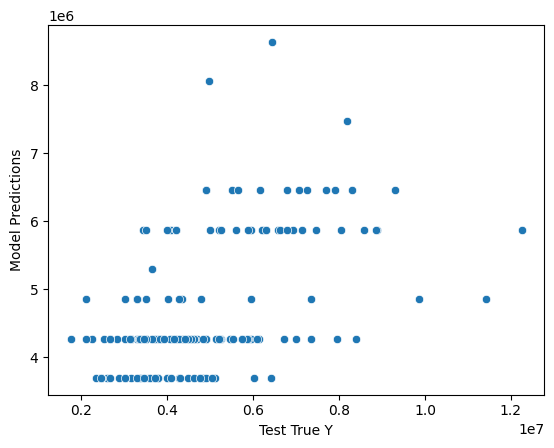

In [84]:
sns.scatterplot(x = 'Test True Y',y='Model Predictions',data = pred_df)

#The Model dont fit very well

In [82]:
pred_df.dropna(inplace = True)

In [74]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [83]:
mean_absolute_error(pred_df['Test True Y'],pred_df['Model Predictions'])

1136690.631097561

In [85]:
df.describe()

,price,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000
mean,4.766729e+06,2.965138,1.286239
std,1.870440e+06,0.738064,0.502470
min,1.750000e+06,1.000000,1.000000
25%,3.430000e+06,2.000000,1.000000
50%,4.340000e+06,3.000000,1.000000
75%,5.740000e+06,3.000000,2.000000
max,1.330000e+07,6.000000,4.000000


In [87]:
mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions'])

2424014648492.0815

In [90]:
np.sqrt(mean_squared_error(pred_df['Test True Y'],pred_df['Model Predictions']))

1556924.7407925925

In [91]:
new_gem = [[2,3]]

In [93]:
new_gem = scaler.transform(new_gem)

In [95]:
#Predicted Value
model.predict(new_gem)

1/1 [==============================] - 0s 56ms/step


array([[5878721.5]], dtype=float32)

In [97]:
from tensorflow.keras.models import load_model

In [98]:
model.save('my_gem_model.h5')

In [99]:
later_model = load_model('my_gem_model.h5')

In [100]:
later_model.predict(new_gem)

1/1 [==============================] - 0s 247ms/step


array([[5878721.5]], dtype=float32)